# Dataviz


## Aparté

Les librairies de visualisation en python se sont beaucoup développées ([10 plotting librairies](http://www.xavierdupre.fr/app/jupytalk/helpsphinx/2016/pydata2016.html)).

La référence reste [matplotlib](http://matplotlib.org/), et la plupart sont pensées pour être intégrées à ses objets (c'est par exemple le cas de [seaborn](https://stanford.edu/~mwaskom/software/seaborn/introduction.html), [mpld3](http://mpld3.github.io/), [plotly](https://plot.ly/) et [bokeh](http://bokeh.pydata.org/en/latest/)). Il est donc utile de commencer par se familiariser avec matplotlib.

In [7]:
#Pour intégrer les graphes à votre notebook, il suffit de faire
%matplotlib inline

In [8]:
#ou alors
%pylab inline
#pylab charge également numpy. C'est la commande du calcul scientifique python.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


La structure des objets décrits par l'API est très hiérarchique, comme illustré par ce schéma :
- "Figure" contient l'ensemble de la représentation visuelle. C'est par exemple grâce à cette méta-structure que l'on peut facilement ajouter un titre à une représentation qui contiendrait plusieurs graphes ;
- "Axes" (ou "Subplots") décrit l'ensemble contenant un ou pusieurs graphes (correspond à l'objet subplot et aux méthodes add_subplot)
- "Axis" correspond aux axes d'un graphique (ou instance de subplot) donné.

<img src="http://matplotlib.org/_images/fig_map.png" />

Une dernière remarque d'ordre général : [pyplot est une machine à état](https://en.wikipedia.org/wiki/Matplotlib).
Cela implique que les méthodes pour tracer un graphe ou éditer un label s'appliquent par défaut au dernier état en cours (dernière instance de subplot ou dernière instance d'axe par exemple).

Conséquence : il faut concevoir ses codes comme une séquence d'instructions (par exemple, il ne faut pas séparer les instructions qui se rapportent au même graphique dans deux cellules différentes du Notebook).

### Figures et Subplots

<Axes: >

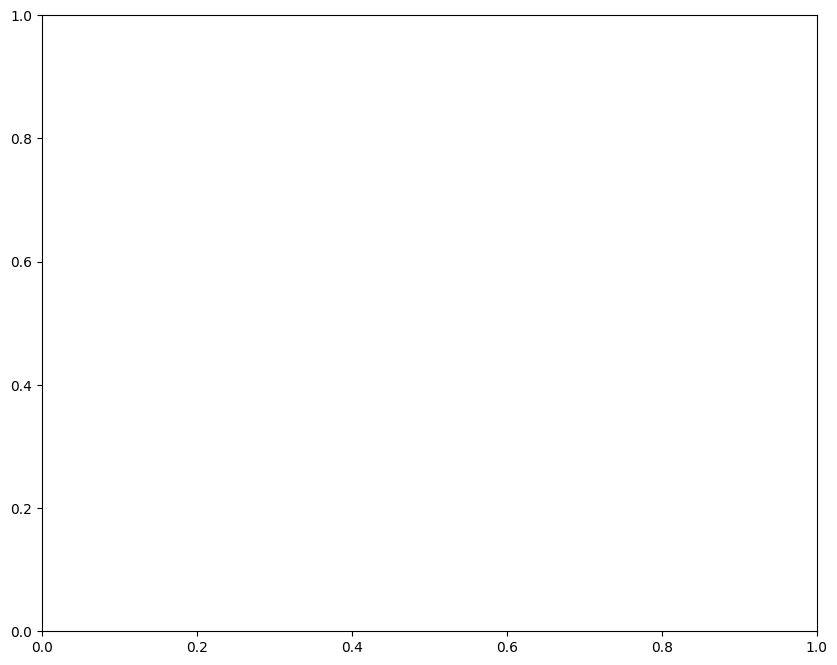

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(111) # Méthode subplot : pour définir les graphiques appartenant à l'objet figure, ici 1 X 1, indice 1
#plt.subplot(1,1,1) fonctionne aussi
#attention, il est nécessaire de conserver toutes les instructions d'un même graphique dans le même bloc
#pas besoin de plt.show() dans un notebook, sinon c'est nécessaire

Un graphique (très) simple avec l'instruction plot.

/var/folders/1m/_vrb71512zv9d4v43d9hh8pr0000gn/T/ipykernel_1580/101266566.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as p


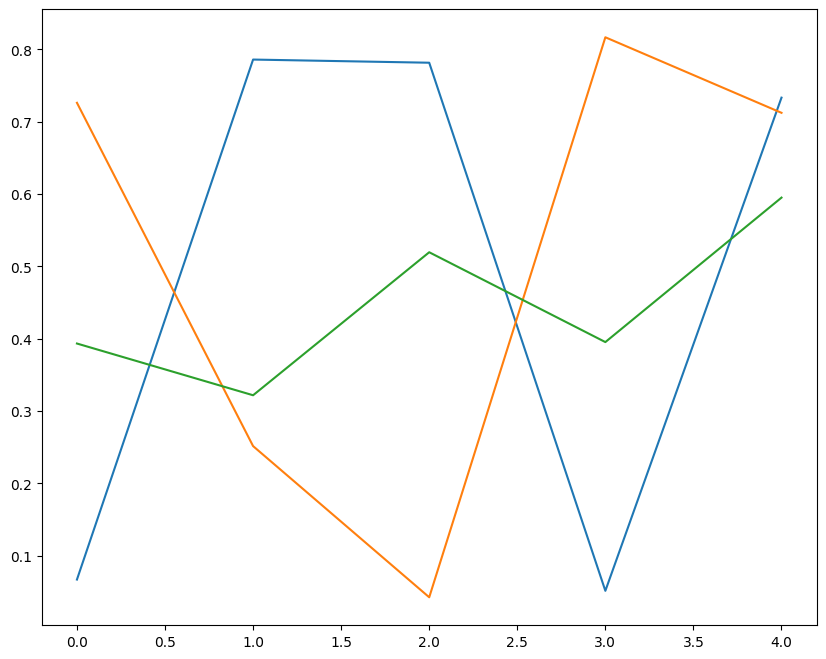

In [10]:
from numpy import random
import numpy as np
import pandas as p

plt.figure(figsize=(10,8))
plt.subplot(111)
plt.plot([random.random_sample(1) for i in range(5)])
#Il est possible de passer des listes, des arrays de numpy, des Series et des Dataframes de pandas
plt.plot(np.array([random.random_sample(1) for i in range(5)]))
plt.plot(p.DataFrame(np.array([random.random_sample(1) for i in range(5)])))
#pour afficher plusieurs courbes, il suffit de cumuler les instructions plt.plot
#plt.show()

Pour faire plusieurs sous graphes, il suffit de modifier les valeurs des paramètres de l'objet subplot.

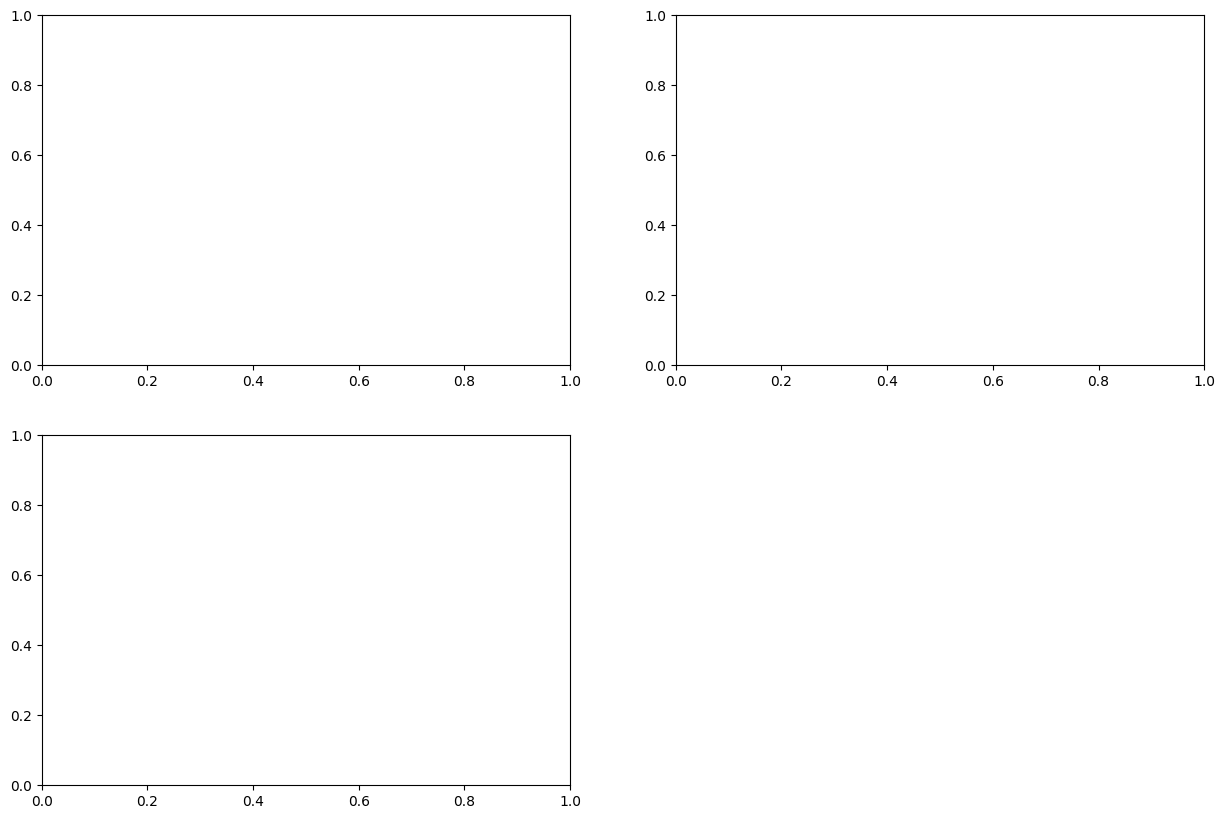

In [11]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1) #modifie l'objet fig et créé une nouvelle instance de subplot, appelée ax1
#vous verrez souvent la convention ax comme instance de subplot : c'est parce que l'on parle aussi d'objet "Axe"
#à ne pas confondre avec l'objet "Axis"
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

Si aucune instance d'axes n'est précisée, la méthode plot est appliquée à la dernière instance créée.

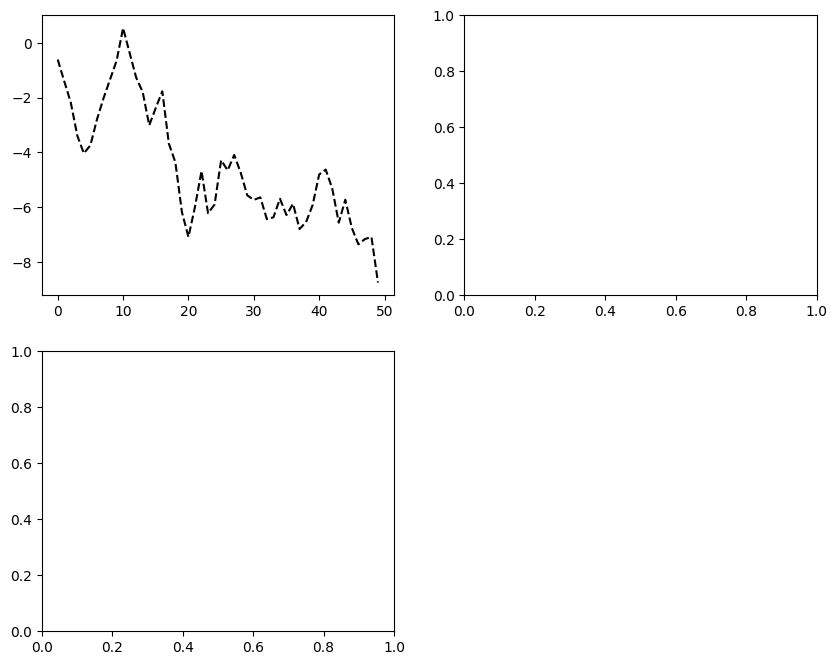

In [12]:
from numpy.random import randn

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax1.plot(randn(50).cumsum(),'k--')
# plt.show()

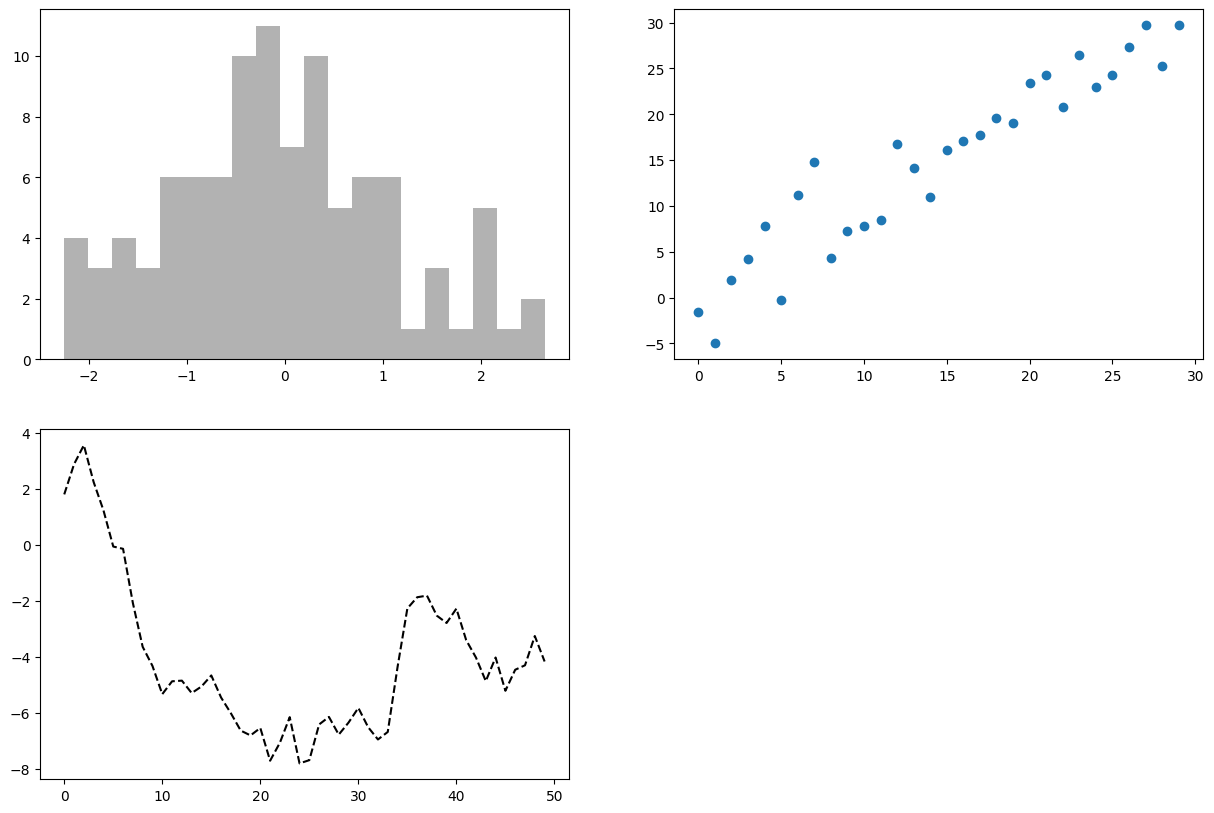

In [13]:
from numpy.random import randn

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# On peut compléter les instances de sous graphiques par leur contenu.
# Au passage, quelques autres exemples de graphes
ax1.hist(randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))
ax3.plot(randn(50).cumsum(),'k--')

Pour explorer l'ensemble des catégories de graphiques possibles : [Gallery](http://matplotlib.org/gallery.html). Les plus utiles pour l'analyse de données : [scatter](http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html), [scatterhist](http://matplotlib.org/examples/axes_grid/scatter_hist.html), [barchart](http://matplotlib.org/examples/pylab_examples/barchart_demo.html), [stackplot](http://matplotlib.org/examples/pylab_examples/stackplot_demo.html), [histogram](http://matplotlib.org/examples/statistics/histogram_demo_features.html), [cumulative distribution function](http://matplotlib.org/examples/statistics/histogram_demo_cumulative.html), [boxplot](http://matplotlib.org/examples/statistics/boxplot_vs_violin_demo.html), , [radarchart](http://matplotlib.org/examples/api/radar_chart.html).

### Ajuster les espaces entre les graphes

<class 'numpy.ndarray'>


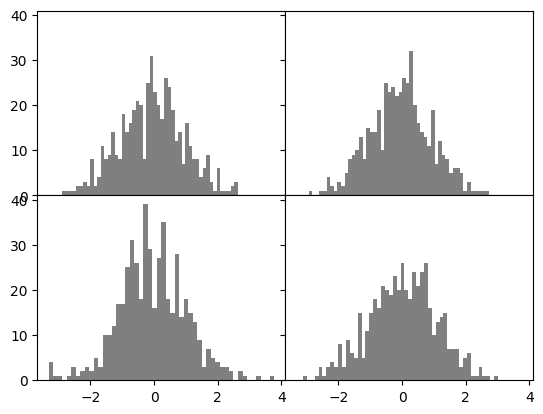

In [14]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
# Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
# ont des axes paramétrés de la même manière
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
# L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
print(type(axes))

# N'h'ésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
plt.subplots_adjust(wspace=0,hspace=0)
# Cette dernière méthode permet de supprimer les espaces entres les sous graphes.

Pas d'autres choix que de paramétrer à la main pour corriger les chiffres qui se superposent.

### Couleurs, Marqueurs et styles de ligne

MatplotLib offre la possibilité d'adopter deux types d'écriture : chaîne de caractère condensée ou paramétrage explicite via un système clé-valeur.

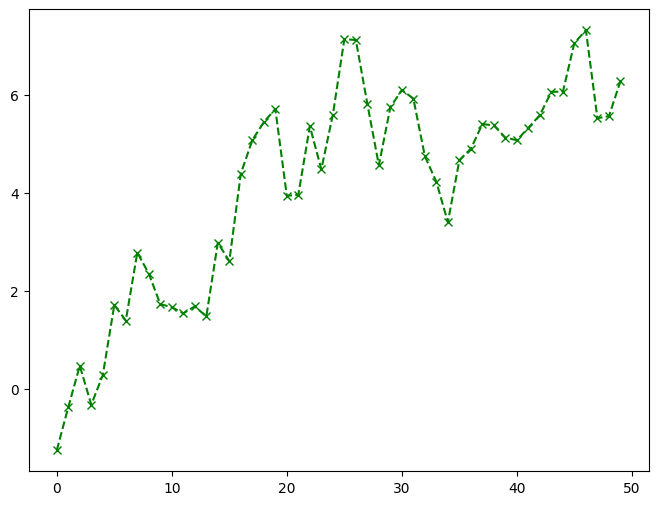

In [15]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(randn(50).cumsum(),color='g',marker='x',linestyle='dashed')
# plt.show()

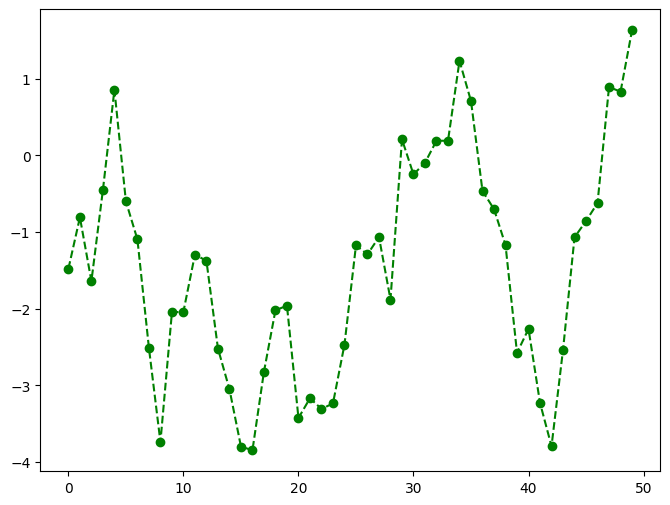

In [16]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(randn(50).cumsum(),'--go') #l'ordre des paramètres n'importe pas

(array([ 1.,  1.,  0.,  8., 13., 27., 18., 16.,  7.,  9.]),
 array([-3.29814066e+00, -2.74829188e+00, -2.19844311e+00, -1.64859433e+00,
        -1.09874555e+00, -5.48896778e-01,  9.51997822e-04,  5.50800774e-01,
         1.10064955e+00,  1.65049833e+00,  2.20034710e+00]),
 <BarContainer object of 10 artists>)

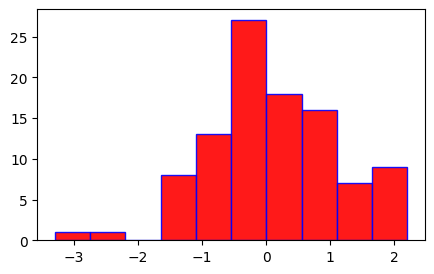

In [17]:
fig = plt.figure(figsize=(5,3))
plt.hist(randn(100),bins=10,color='r',alpha=0.9, edgecolor='b')

Plus de détails dans la documentation sur l'API de matplotlib pour paramétrer la
<a href="http://matplotlib.org/api/colors_api.html">
couleur
</a>
, les
<a href="http://matplotlib.org/api/markers_api.html">
markers
</a>
, et le
<a href="http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle">
style des lignes
</a>
. MatplotLib est compatible avec plusieurs standards de couleur :
- sous forme d'une lettre : 'b' = blue (bleu), 'g' = green (vert), 'r' = red (rouge), 'c' = cyan (cyan), 'm' = magenta (magenta), 'y' = yellow (jaune), 'k' = black (noir), 'w' = white (blanc).
- sous forme d'un nombre entre 0 et 1 entre quotes qui indique le niveau de gris : par exemple '0.70' ('1' = blanc, '0' = noir).
- sous forme d'un nom : par exemple 'red'.
- sous forme html avec les niveaux respectifs de rouge (R), vert (G) et bleu (B) : '#ffee00'. Voici un site pratique pour récupérer une couleur en [RGB hexadécimal](http://www.proftnj.com/RGB3.htm).
- sous forme d'un triplet de valeurs entre 0 et 1 avec les niveaux de R, G et B : (0.2, 0.9, 0.1).

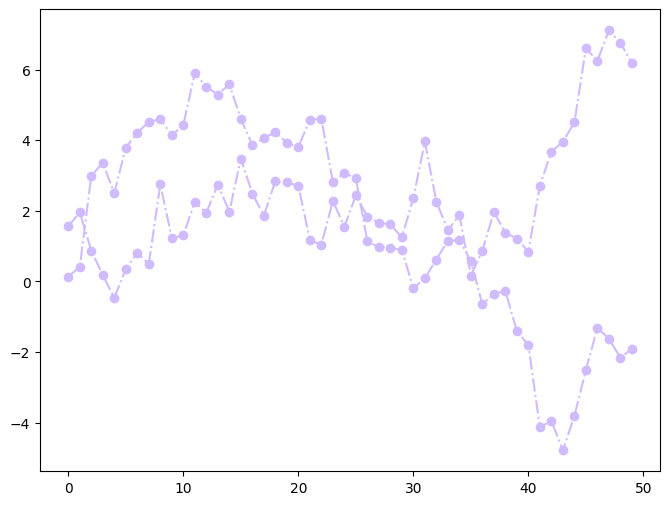

In [18]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
#avec la norme RGB
ax1.plot(randn(50).cumsum(),color='#D0BBFF',marker='o',linestyle='-.')
ax1.plot(randn(50).cumsum(),color=(0.8156862745098039, 0.7333333333333333, 1.0),marker='o',linestyle='-.')

### Ticks labels et legendes

3 méthodes clés :
- xlim() : pour délimiter l'étendue des valeurs de l'axe
- xticks() : pour passer les graduations sur l'axe
- xticklabels() : pour passer les labels

Pour l'axe des ordonnées c'est ylim, yticks, yticklabels.

Pour récupérer les valeurs fixées :
- plt.xlim() ou plt.get_xlim()
- plt.xticks() ou plt.get_xticks()
- plt.xticklabels() ou plt.get_xticklabels()
    
Pour fixer ces valeurs :
- plt.xlim([start,end]) ou plt.set_xlim([start,end])
- plt.xticks(my_ticks_list) ou plt.get_xticks(my_ticks_list)
- plt.xticklabels(my_labels_list) ou plt.get_xticklabels(my_labels_list)

Si vous voulez customiser les axes de plusieurs sous graphiques, passez par une [instance de axis](http://matplotlib.org/users/artists.html) et non subplot.

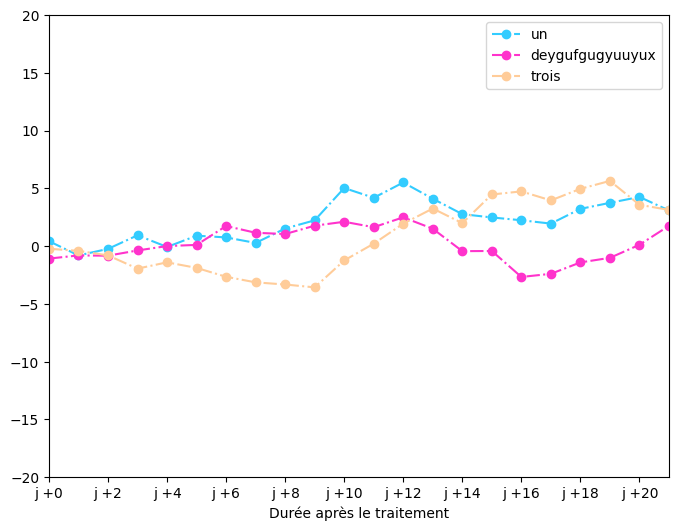

In [19]:
from numpy.random import randn
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)

serie1=randn(50).cumsum()
serie2=randn(50).cumsum()
serie3=randn(50).cumsum()
ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deygufgugyuuyux')
ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

#sur le graphe précédent, pour raccourcir le range
ax1.set_xlim([0,21])
ax1.set_ylim([-20,20])
#faire un ticks avec un pas de 2 (au lieu de 5)
ax1.set_xticks(range(0,21,2))
#changer le label sur la graduation
ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
ax1.set_xlabel('Durée après le traitement')

ax1.legend(loc='best')
#permet de choisir l'endroit le plus vide

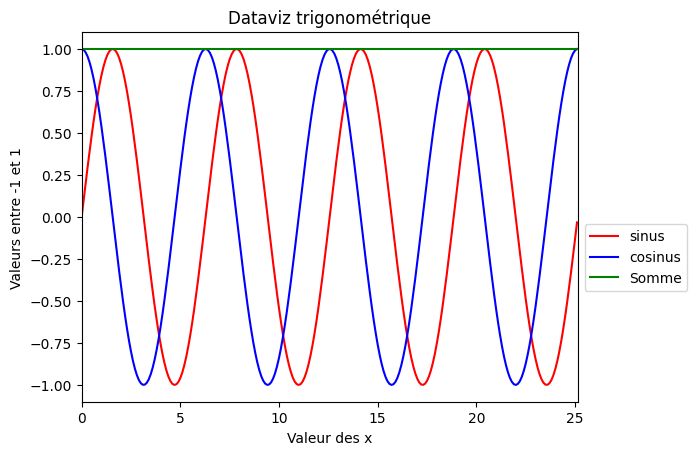

In [20]:
x = np.arange(0,8*np.pi,0.1)
sin = np.sin(x)
cos = np.cos(x)
sum = (np.cos(x))**2 +(np.sin(x))**2

plt.plot(x,sin,label="sinus", color='r')
plt.plot(x,cos,label="cosinus",color='b')
plt.plot(x,sum,label="Somme",color='g')

plt.title('Dataviz trigonométrique')
plt.xlabel('Valeur des x')
plt.ylabel('Valeurs entre -1 et 1')

plt.xlim(0,8*np.pi)
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))

In [21]:
[np.sin(i) for i in range(7)]

[0.0,
 0.8414709848078965,
 0.9092974268256817,
 0.1411200080598672,
 -0.7568024953079283,
 -0.9589242746631385,
 -0.27941549819892586]

### Inclusion d'annotation et de texte, titre et libellé des axes

Text(5, -10, '$\\mu=100,\\ \\sigma=15$')

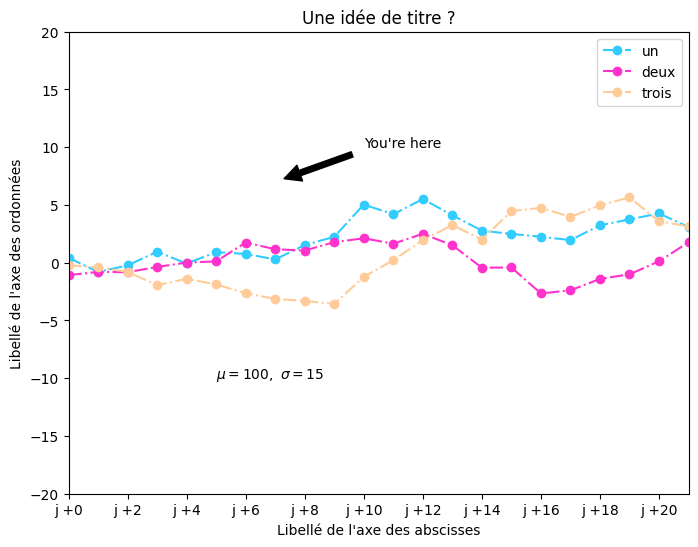

In [22]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

ax1.set_xlim([0,21])
ax1.set_ylim([-20,20])
ax1.set_xticks(range(0,21,2))
ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
ax1.set_xlabel('Durée après le traitement')

ax1.annotate("You're here", xy=(7, 7), #point de départ de la flèche
             xytext=(10, 10),          #position du texte
            arrowprops=dict(facecolor='#000000', shrink=0.10),
            )

ax1.legend(loc='best')

plt.xlabel("Libellé de l'axe des abscisses")
plt.ylabel("Libellé de l'axe des ordonnées")
plt.title("Une idée de titre ?")
plt.text(5, -10, r'$\mu=100,\ \sigma=15$')

# plt.show()

### matplotlib et le style

Il est possible de définir son propre style. Cette possibilité est intéressante si vous faîtes régulièrement les mêmes graphes et voulez définir des templates (plutôt que de copier/coller toujours les mêmes lignes de code). Tout est décrit dans [style_sheets](http://matplotlib.org/users/style_sheets.html).

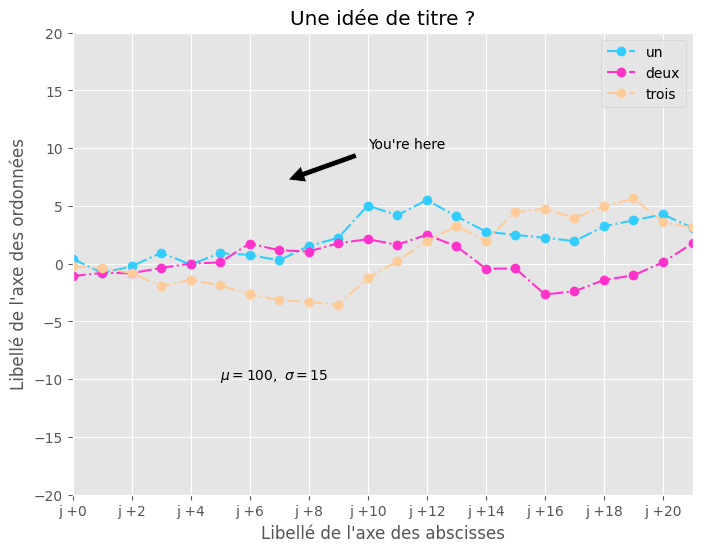

In [23]:
from numpy.random import randn

#pour que la définition du style soit seulement dans cette cellule notebook
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
    ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
    ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

    ax1.set_xlim([0,21])
    ax1.set_ylim([-20,20])
    ax1.set_xticks(range(0,21,2))
    ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
    ax1.set_xlabel('Durée après le traitement')

    ax1.annotate("You're here", xy=(7, 7), #point de départ de la flèche
                 xytext=(10, 10),          #position du texte
                arrowprops=dict(facecolor='#000000', shrink=0.10),
                )

    ax1.legend(loc='best')

    plt.xlabel("Libellé de l'axe des abscisses")
    plt.ylabel("Libellé de l'axe des ordonnées")
    plt.title("Une idée de titre ?")
    plt.text(5, -10, r'$\mu=100,\ \sigma=15$')

    #plt.show()

De nombreux autres styles sont disponibles, pick up your choice!  ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


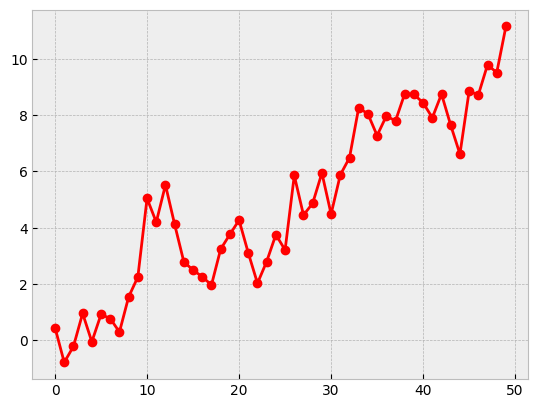

In [24]:
import numpy as np
import matplotlib.pyplot as plt

print("De nombreux autres styles sont disponibles, pick up your choice! ", plt.style.available)
with plt.style.context('bmh'):
    plt.plot(serie1, 'r-o')

# plt.show()

Comme suggéré dans le nom des styles disponibles dans matplotlib, la librairie seaborn, qui est une sorte de surcouche de matplotlib, est un moyen très pratique d'accéder à des styles pensés et adaptés pour la mise en valeur de pattern dans les données.

Voici quelques exemples, toujours sur la même série de données. Je vous invite également à explorer les [palettes de couleurs](https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html).

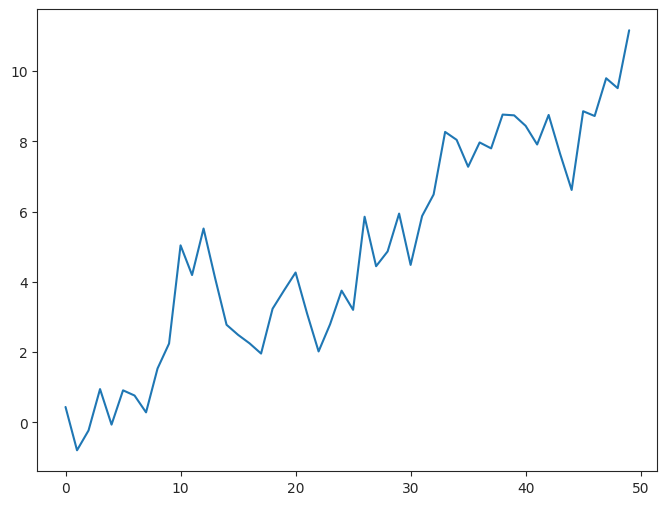

In [25]:
#on peut remarquer que le style ggplot est resté.
import seaborn as sns

#5 styles disponibles
#sns.set_style("whitegrid")
#sns.set_style("darkgrid")
#sns.set_style("white")
#sns.set_style("dark")
#sns.set_style("ticks")

#si vous voulez définir un style temporairement
with sns.axes_style("ticks"):
    fig = plt.figure(figsize(8,6))
    ax1 = fig.add_subplot(1,1,1)
    plt.plot(serie1)

En dehors du style et des couleurs, Seaborn a mis l'accent sur :
- les graphes de distribution ([univariés](https://stanford.edu/~mwaskom/software/seaborn/examples/distplot_options.html#distplot-options) / [bivariés](https://stanford.edu/~mwaskom/software/seaborn/examples/joint_kde.html#joint-kde)). Particulièrement utiles et pratiques : les [pairwiseplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset)
- les graphes de [régression](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html)
- les graphes de [variables catégorielles](https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html)
- les [heatmap](https://stanford.edu/~mwaskom/software/seaborn/examples/heatmap_annotation.html) sur les matrices de données

Seaborn ce sont des graphes pensés pour l'analyse de données et la présentation de rapports à des collègues ou clients. C'est peut-être un peu moins customisable que matplotlib mais vous avez le temps avant de vous sentir limités dans les possibilités.

# Matplotlib et pandas, interactions avec seaborn

Comme vu précédemment, matplotlib permet de manipuler et de représenter sous forme de graphes toutes sortes d'objets : listes, arrays numpy, Series et DataFrame pandas. Inversement, pandas a prévu des méthodes qui intègrent les objets matplotlib les plus utiles pour le tracé de graphiques. Nous allons tester un peu l'intégration [pandas/matplotlib](http://pandas.pydata.org/pandas-docs/stable/visualization.html). D'une manière générale, tout un [écosystème](http://pandas.pydata.org/pandas-docs/stable/ecosystem.html#ecosystem-visualization) de visualisation s'est développé autour de pandas. Nous allons tester les différentes librairies évoquées. Télécharger les données  disponible sur le site de l'INSEE [Naissances, décès et mariages de 1998 à 2013](https://www.insee.fr/fr/statistiques/2407910?sommaire=2117120#titre-bloc-3).

In [26]:
import urllib.request
import zipfile

def download_and_save(name, root_url):
    if root_url == 'xd':
        from pyensae.datasource import download_data
        download_data(name)
    else:
        response = urllib.request.urlopen(root_url+name)
        with open(name, "wb") as outfile:
            outfile.write(response.read())

def unzip(name):
    with zipfile.ZipFile(name, "r") as z:
        z.extractall(".")

filenames = ["etatcivil2012_mar2012_dbase.zip",
             "etatcivil2012_nais2012_dbase.zip",
             "etatcivil2012_dec2012_dbase.zip", ]

# Une copie des fichiers a été postée sur le site www.xavierdupre.fr
# pour tester le notebook plus facilement.
root_url = 'xd' # http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/'

for filename in filenames:
    download_and_save(filename, root_url)
    unzip(filename)
    print("Download of {}: DONE!".format(filename))

Download of etatcivil2012_mar2012_dbase.zip: DONE!
Download of etatcivil2012_nais2012_dbase.zip: DONE!
Download of etatcivil2012_dec2012_dbase.zip: DONE!


Penser à installer le module [dbfread](https://github.com/olemb/dbfread/) si ce n'est pas fait.

In [27]:
import pandas
try:
    from dbfread import DBF
    use_dbfread = True
except ImportError as e :
    use_dbfread = False

if use_dbfread:
    print("use of dbfread")
    def dBase2df(dbase_filename):
        table = DBF(dbase_filename, load=True, encoding="cp437")
        return pandas.DataFrame(table.records)

    df = dBase2df('mar2012.dbf')
    #df.to_csv("mar2012.txt", sep="\t", encoding="utf8", index=False)
else :
    print("use of zipped version")
    import pyensae.datasource
    data = pyensae.datasource.download_data("mar2012.zip")
    df = pandas.read_csv(data[0], sep="\t", encoding="utf8", low_memory = False)

df.shape, df.columns

use of zipped version


((246123, 16),
 Index(['AMAR', 'ANAISF', 'ANAISH', 'DEPDOM', 'DEPMAR', 'DEPNAISF', 'DEPNAISH',
        'ETAMATF', 'ETAMATH', 'INDNATF', 'INDNATH', 'JSEMAINE', 'MMAR',
        'NBENFCOM', 'TUCOM', 'TUDOM'],
       dtype='object'))

Dictionnaire des variables.

Représentez l'age des femmes en fonction de celui des hommes au moment du mariage.

In [28]:
#Calcul de l'age (au moment du mariage)
df.head()

,AMAR,ANAISF,ANAISH,DEPDOM,DEPMAR,DEPNAISF,DEPNAISH,ETAMATF,ETAMATH,INDNATF,INDNATH,JSEMAINE,MMAR,NBENFCOM,TUCOM,TUDOM
0,2012,1984,1982,99,29,99,75,1,1,2,1,1,1,N,NaN,9
1,2012,1969,1956,99,75,99,69,4,4,2,2,3,1,N,NaN,9
2,2012,1992,1982,99,34,99,99,1,1,1,2,5,1,N,NaN,9
3,2012,1987,1985,99,13,84,99,1,1,1,2,4,1,N,NaN,9
4,2012,1963,1968,99,26,99,99,1,1,2,2,6,1,N,NaN,9


In [29]:
#conversion des années en entiers
for c in ['AMAR','ANAISF','ANAISH']:
    df[c]=df[c].apply(lambda x: int(x))

#calcul de l'age
df['AGEF'] = df['AMAR'] - df['ANAISF']
df['AGEH'] = df['AMAR'] - df['ANAISH']

Le module pandas a prévu un [wrapper](http://pandas.pydata.org/pandas-docs/stable/visualization.html) matplotlib

<Axes: xlabel='AGEH', ylabel='AGEF'>

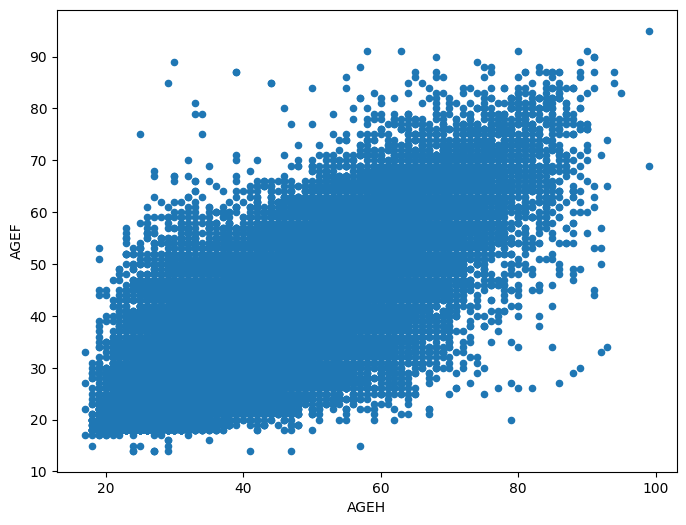

In [30]:
#version pandas : df.plot()
#deux possibilités : l'option kind dans df.plot()
df.plot(x='AGEH',y='AGEF',kind='scatter')
#ou la méthode scatter()
#df.plot.scatter(x='AGEH',y='AGEF')
#ensemble des graphiques disponibles dans la méthode plot de pandas : df.plot.<TAB>

Text(0, 0.5, 'AGEF')

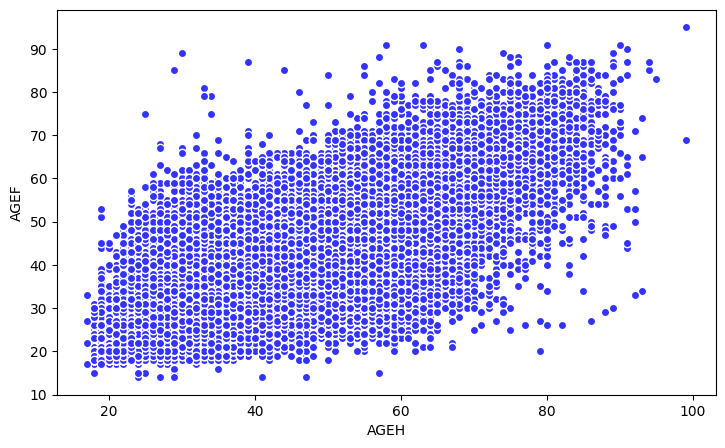

In [31]:
#version matplotlib

from matplotlib import pyplot as plt

# plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize(8.5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['AGEH'],df['AGEF'], color="#3333FF", edgecolors='#FFFFFF')
plt.xlabel('AGEH')
plt.ylabel('AGEF')

Text(0, 0.5, 'AGEH')

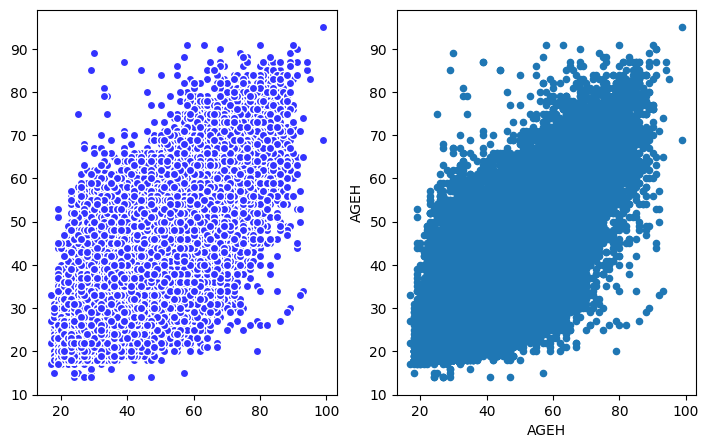

In [32]:
#Si vous voulez les deux graphes en 1, il suffit de reprendre la structure de matplotlib
#(notamment l'objet subplot) et de voir comment il peut etre appelé dans
#chaque méthode de tracé (df.plot de pandas et sns.plot de searborn)

from matplotlib import pyplot as plt

# plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize(8.5,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['AGEH'],df['AGEF'], color="#3333FF", edgecolors='#FFFFFF')
df.plot(x='AGEH',y='AGEF',kind='scatter',ax=ax2)

plt.xlabel('AGEH')
plt.ylabel('AGEH')

# Exercice 1 : représentez l'âge des hommes en fonction de l'âge des femmes dans les couples mariés

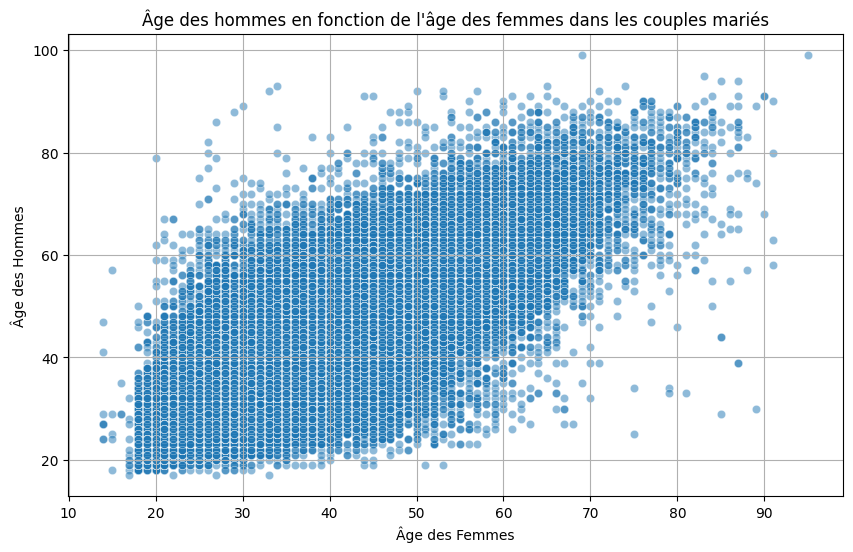

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
sns.scatterplot(x='AGEF', y='AGEH', data=df, alpha=0.5)  

plt.title('Âge des hommes en fonction de l\'âge des femmes dans les couples mariés') 
plt.xlabel('Âge des Femmes')  
plt.ylabel('Âge des Hommes')  
plt.grid(True)  

plt.show()  


# Exercice 2 : représentez la répartition de la différence d'âge de couples mariés

# Exercice 3 : représentez le nombre de mariages par département

On peut le représenter en termes absolus, mais c'est sûrement plus intéressant de le représenter relativement à la population des départements. Il vous faut donc trouver en ligne les données de populations des départements.

Vous pouvez utiliser le module `folium` pour dessiner des cartes.

# Exercice 4 : représentez la répartition du nombre de mariages par jour

Par jour de la semaine, ou par jour de l'année...